**Malaria Detection** : In this project we have detected malaria from the cell images.This is a classification problem where at the end we detect if the cell in the image is infected or not.We have used Convolutional Nueral Network which is generally used in image recognition and processing that is specifically designed to process pixel data.

In [2]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization,Activation

**Mounting Google Drive:**  We have stored our dataset in the google drive and mounted the drive to google colab to load the dataset.

In [3]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Unzip the dataset
!unzip drive/MyDrive/cell_images.zip


Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

In [5]:
#Importing open libraries related to image.
import os
import cv2
from PIL import Image

Load the Parasitized and Uninfected data to the list 

**Reading Data**
For Malaria Detection we have used the Malaria Image Cells Dataset. We have uploaded the .Zip file google drive and mounted it to google colab. we have used OpenCV, for reading the images from the dataset. <br>
***Libraries And Methods used :***
cv2.imread() - For reading the images openCV library is used and method is imread



In [6]:
#Obtain all the list of files in datset
infected = os.listdir('cell_images/Parasitized')
uninfected = os.listdir('cell_images/Uninfected')

In this step, we are converting images to numpy array so that we can better perform numerical operations on the data rather than the images data <br>
***Libraries And Methods used :*** <br>
np.array() - We have used the array method from the numpy library to convert the input to an array of images


In [7]:
#creating two list to save the labels and images
cell_data = []
labels = []

#Resizing of the parasitized data to the required dimention
for cell in infected:
    try:
        if cell != "Thumbs.db":
          image=cv2.imread("cell_images/Parasitized/" + cell)
          image_from_array = Image.fromarray(image,'RGB')
          size_image = image_from_array.resize((45,45))
          cell_data.append(np.array(size_image))
          labels.append(1)
    except AttributeError:
        print("Error While reading infected data!!" + cell)

In [8]:
#Resizing of the uninfected data to the required dimention
for cell in uninfected:
    try:
      if cell != "Thumbs.db":
        image=cv2.imread("cell_images/Uninfected/" + cell)
        image_from_array=Image.fromarray(image,'RGB')
        size_image=image_from_array.resize((45,45))
        cell_data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("Error while reading uninfected")

In [9]:
#Creating arrays to store the data
cells = np.array(cell_data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

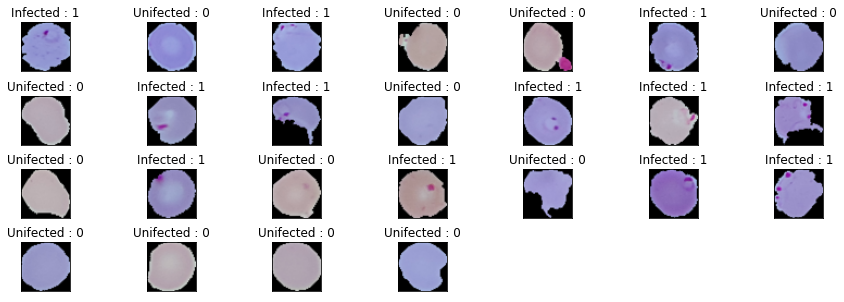

In [10]:
#Plotting infected and uninfected cell images
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(25):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [28]:
#Creating array with evenly spaced values.
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

**Splitting images and Normalize the data**
Here we are splitting the dataset to train and test then further we are splitting the test dataset to evaluate the dataset for determining the accuracy of the model. <br>
***Libraries And Methods used :*** <br>
astype(float32) - For converting to float values
train_test_split - For splitting the dataset to train and test.


In [12]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

In [13]:
img_rows = 45
img_cols = 45
num_classes = 2
epochs = 10
batch_size = 128

**Resize the images**
.We have resized all the images to (45,45) so that all the images are having same size which can be fed to a Input layer
***Libraries And Methods used :***

resize() - To resize all the images to the same size so that they can be fed to the input layer of the model.



In [14]:
if K.image_data_format() == 'channels_first':
    train_x = train_x.reshape(train_x.shape[0], 3, img_rows, img_cols)
    test_x = test_x.reshape(test_x.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 3)
    eval_x = eval_x.reshape(eval_x.shape[0], img_rows, img_cols, 3)
    test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [15]:
#Data pre-processing
#Conversion into float type
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
eval_x=eval_x.astype('float32')

#Scaling the data.
train_x /= 255
test_x /= 255
eval_x/=255

#Printing the shapes of different samples
print('x_train shape:', train_x.shape)
print(train_x.shape[0], 'train samples')
print(test_x.shape[0], 'test samples')
print(eval_x.shape[0],'validation samples')

x_train shape: (22046, 45, 45, 3)
22046 train samples
2756 test samples
2756 validation samples


In [16]:
test_y1 = test_y
test_y1

array([0, 0, 0, ..., 1, 1, 0])

In [17]:
# convert class vectors to binary class matrices
from keras.utils import np_utils
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)
eval_y = np_utils.to_categorical(eval_y, 2)

In [18]:
#number of classes 
num_classes=len(np.unique(labels))
num_classes
train_y.shape
train_y[0]

array([1., 0.], dtype=float32)

**Model:**
In our Malaria Detection application, We have used a Convolutional neural network model that can be used for image prediction.
Libraries and methods used in the model as follows:

save() -  We have saved the model using save method in .h5 format

Sequential()  - We have used Sequential to stack the layers to a model.

add() - We have used add method to add various layers to the model i.e, Convolutional Neural Network,Batch Normalization,Dropout layer etc.,

predict_classes() - Inorder to determine the class label of the test images we have used predic_classes

accuracy_score() - To determine the test accuracy of the model


In [19]:
#Creating a sequential model
model = Sequential()

#Input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
#Flattened layer to convert matrix data into vector.
model.add(Flatten())

#Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

In [20]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 9, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          3

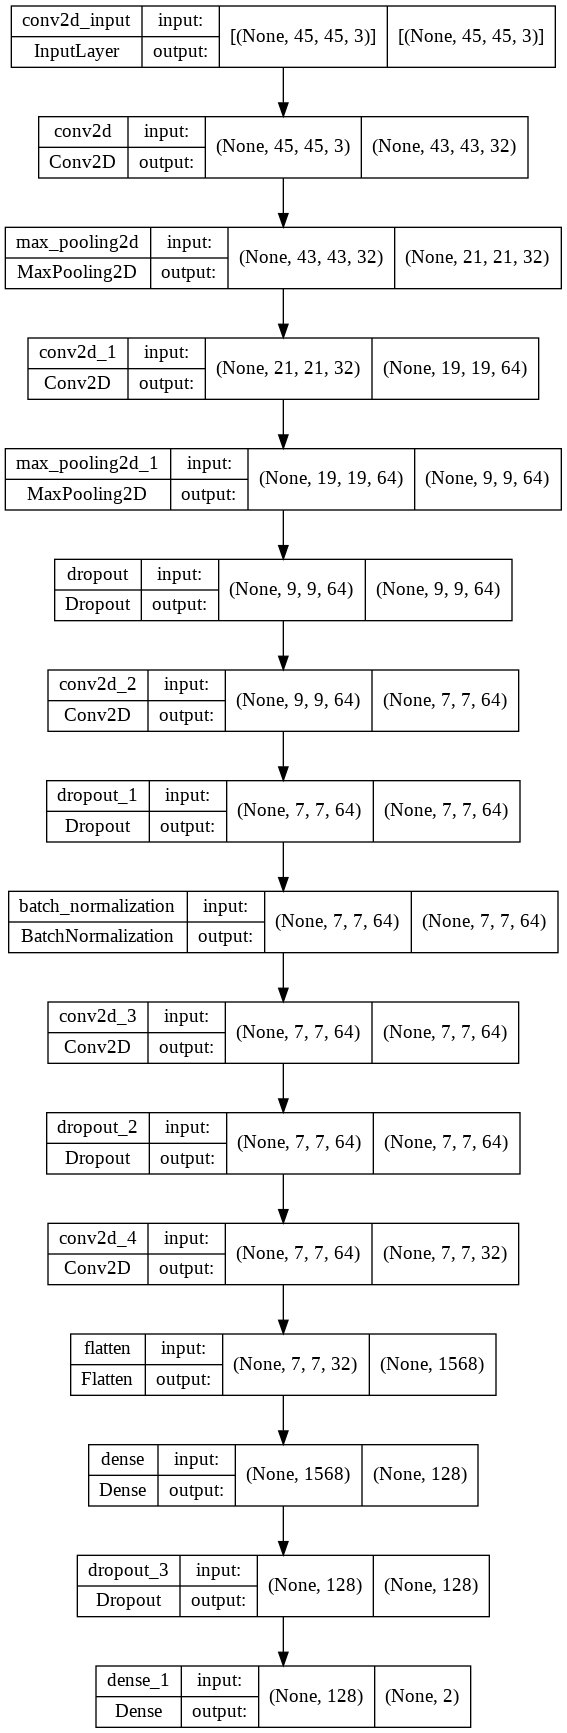

In [21]:
#Plotting the model
plot_model(model,show_shapes=True,show_layer_names=True,to_file='cnn_model.png')

**compile()** -  To create learning for the model we have used a compile method. We have used binary cross entropy as the loss function and adam as our optimizer and metric as our accuracy.We have used binary cross entropy as our loss function because we have two labels at the end for prediction.

**predict()** - To determine the result of the test data we have used the predict method.

**fit()** - For training the model we have used fit method.We have used model_checkpoint as our call back function to save weights or model at some point in time.


In [22]:
#Implementing the callbacks to avoid overfitting
checkpoint_filepath = '/tmp/checkpoint'

model_checkpoint=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,monitor='val_accuracy',
    save_best_only=True,save_weights_only=True,
    mode='max')

#Configuring the model for training
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),metrics=['accuracy'])

#To record each event in the history object.
history=model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,callbacks=[model_checkpoint],
          validation_data=(eval_x,eval_y))

Epoch 1/10
173/173 [==============================] - 74s 418ms/step - loss: 0.5643 - accuracy: 0.6808 - val_loss: 0.5686 - val_accuracy: 0.8697
Epoch 2/10
173/173 [==============================] - 68s 391ms/step - loss: 0.2167 - accuracy: 0.9255 - val_loss: 0.3471 - val_accuracy: 0.9441
Epoch 3/10
173/173 [==============================] - 68s 395ms/step - loss: 0.1736 - accuracy: 0.9405 - val_loss: 0.1800 - val_accuracy: 0.9496
Epoch 4/10
173/173 [==============================] - 67s 387ms/step - loss: 0.1627 - accuracy: 0.9471 - val_loss: 0.1698 - val_accuracy: 0.9478
Epoch 5/10
173/173 [==============================] - 66s 384ms/step - loss: 0.1531 - accuracy: 0.9487 - val_loss: 0.1683 - val_accuracy: 0.9561
Epoch 6/10
173/173 [==============================] - 68s 392ms/step - loss: 0.1448 - accuracy: 0.9518 - val_loss: 0.1519 - val_accuracy: 0.9572
Epoch 7/10
173/173 [==============================] - 68s 393ms/step - loss: 0.1390 - accuracy: 0.9536 - val_loss: 0.1408 - val_ac

In [23]:
#Evaluating the model and printing loss and accuracy results
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13064594566822052
Test accuracy: 0.9579100012779236


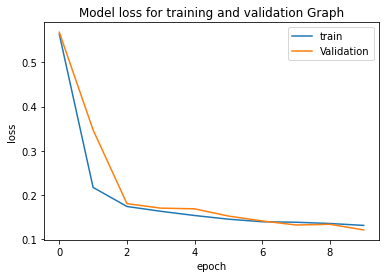

In [24]:
# Loss Curves
#Plot the loss for training and validation in the same plot.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for training and validation Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper right')
plt.show()

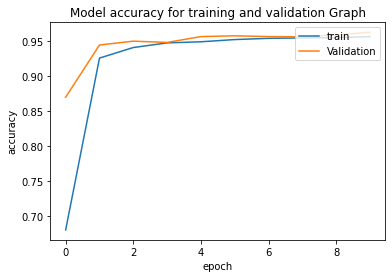

In [25]:
# Accuracy Curves 
#Plot the accuracy for training and validation in the same plot.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy for training and validation Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper right')
plt.show()


**Saving the model** <br>
Here we are saving the model in .h5 format. We can load the model by using this in our flask application. 

In [26]:
 # creates a HDF5 file 'my_model.h5'
from keras.models import load_model
model.save('CNNmodel.h5') 

In [27]:
model = load_model('CNNmodel.h5')